In [ ]:
!pip install scikit-learn

In [ ]:
# import some librreries and frameworks to do some basic analysis of our data, and then the sklearn framework in order to create a prediction model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dataset = pd.read_csv('cardekho_data.csv')

In [ ]:
dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [ ]:
dataset.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
283,city,2016,8.99,11.80,9010,Petrol,Dealer,Manual,0
20,alto k10,2016,2.85,3.95,25000,Petrol,Dealer,Manual,0
232,elantra,2015,11.45,14.79,12900,Petrol,Dealer,Automatic,0
141,Bajaj Avenger 150 street,2016,0.60,0.80,20000,Petrol,Individual,Manual,0
11,ciaz,2015,6.85,10.38,51000,Diesel,Dealer,Manual,0


In [ ]:
dataset.info(). # looking at the dtypes of the columns, we know now that we have to
                # Change the variable type of owner, Transmission, Sellet_type, and Fuel_Type

SyntaxError: invalid syntax (<ipython-input-13-049008c1bfcb>, line 1)

In [ ]:
# To see until what year we have we do the following
print(sorted(dataset['Year'].unique())) # we have data until 2018, so the newest product was realized in 2018.

[2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [ ]:
dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
len(dataset['Car_Name'].value_counts()) # This line is to check all the different values of names that we have in the dataset

98

In [ ]:
dataset['Year'].value_counts()

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64

In [ ]:
dataset['Fuel_Type'].value_counts()


Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

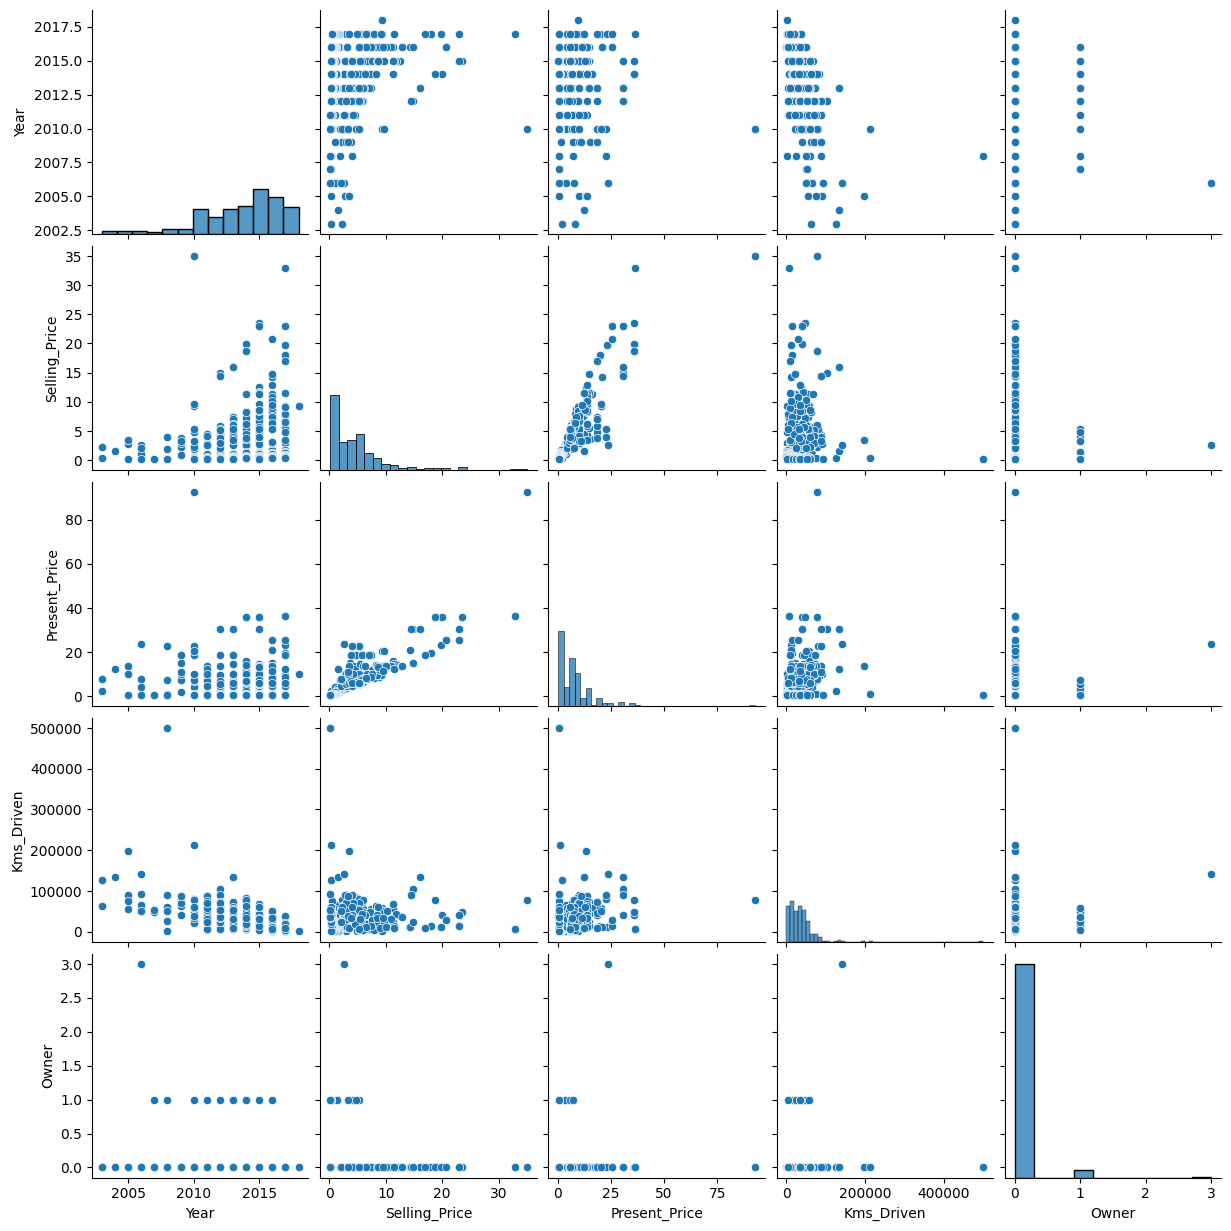

In [ ]:
# Pairplot
sns.pairplot(dataset)
plt.show()

In [ ]:
dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


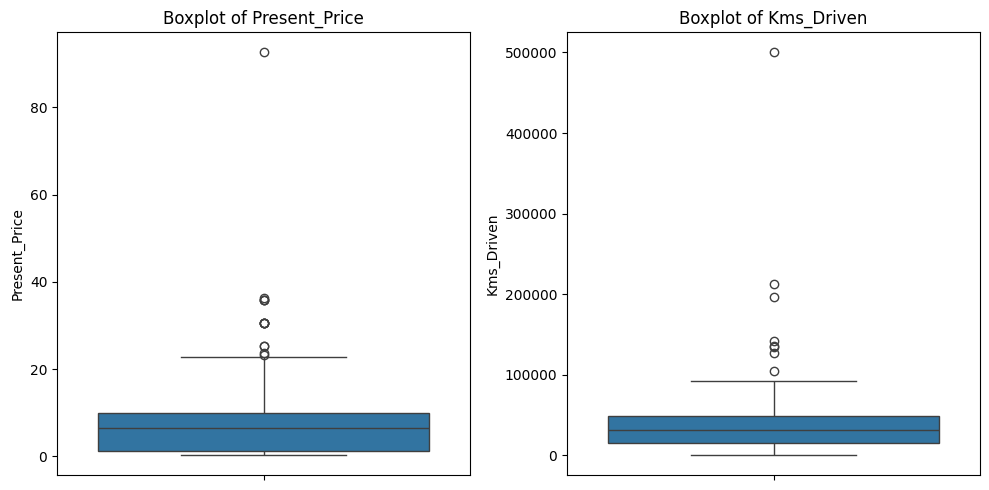

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot(y ='Present_Price', data=dataset, ax=axs[0])
axs[0].set_title('Boxplot of Present_Price')

sns.boxplot(y='Kms_Driven', data=dataset, ax=axs[1])
axs[1].set_title('Boxplot of Kms_Driven')

plt.tight_layout()
plt.show()


In [ ]:
# Capping Outliers
def capping_outlier(col):
    percentile25 = dataset[col].quantile(0.25) # here we are using the numoy function quantile
    percentile75 = dataset[col].quantile(0.75)
    iqr = percentile75 - percentile25  # iqr stands for nterquartile Range

    upper_limit = percentile75 + 1.5 * iqr   # this is the formula for an upper limit in the dataset
    lower_limit = percentile25 - 1.5 * iqr   # this is the formula for an lower limit in the dataset

    dataset[col] = np.where(
        dataset[col] > upper_limit,
        upper_limit,
        np.where(
            dataset[col] < lower_limit,
            lower_limit,
            dataset[col]
        )
    )


capping_outlier('Present_Price')
capping_outlier('Kms_Driven')

In [ ]:
# plt.figure(figsize=(16,8))
# plt.subplot(2,2,1)
# sns.distplot(dataset['Present_Price'])

# plt.subplot(2,2,2)
# sns.boxplot(dataset['Present_Price'])

# plt.subplot(2,2,3)
# sns.distplot(dataset['Kms_Driven'])

# plt.subplot(2,2,4)
# sns.boxplot(dataset['Kms_Driven'])

# plt.show()

# before we train our model lets check for not-numerical values:

# Check for non-numeric columns
non_numeric_columns = dataset.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# One-hot encode non-numeric columns
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_cols = encoder.fit_transform(dataset[non_numeric_columns])


# Get the categories used for encoding
categories = encoder.categories_

# Construct feature names based on categories (excluding the first category)
feature_names = []
for i, category_list in enumerate(categories):
    feature_names.extend([f'{non_numeric_columns[i]}_{category}' for category in category_list[1:]])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=feature_names)

# Concatenate the original DataFrame with the encoded DataFrame, excluding the original non-numeric columns
df_encoded = pd.concat([dataset.drop(non_numeric_columns, axis=1), encoded_df], axis=1)

# Verify that all columns are numeric
print("Column data types after encoding:\n", df_encoded.dtypes)


Non-numeric columns: Index(['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')
Column data types after encoding:
 Year                        int64
Selling_Price             float64
Present_Price             float64
Kms_Driven                float64
Owner                       int64
                           ...   
Car_Name_xcent            float64
Fuel_Type_Diesel          float64
Fuel_Type_Petrol          float64
Seller_Type_Individual    float64
Transmission_Manual       float64
Length: 106, dtype: object


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Define features (X) and target (y)
X = df_encoded.drop(columns=['Selling_Price'])
y = df_encoded['Selling_Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(random_state=42, max_depth=11)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=11, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


# Calculate Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R2 Score:", r2)

Mean Squared Error (MSE): 1.0586511975020962
Mean Absolute Error (MAE): 0.6655765019179365
R2 Score: 0.9540427899031773
